In [8]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/workingData')




MSE = 1642.971673339624
MAE = 33.03484441401907
R-squared = 0.6780190080340691
k = 10:  2388.9668537292987
LOOCV:  1952.9829695250535


Text(0, 0.5, 'Co2 (millions of tons)')

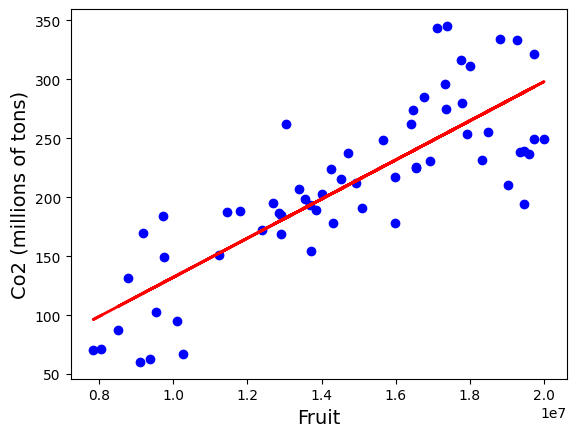

In [9]:



test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)


linModel = LinearRegression()
linModel.fit(X,y)
y_pred = linModel.predict(X)


print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))

ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))


plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

# plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
# plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
# plt.ylabel('Mean squared errors', fontsize=14)
# plt.xticks([0, 1], ['10-fold', 'LOOCV'])

MSE = 1479.7132918875654
MAE = 31.009571941684516
R-squared = 0.7100135314088004
k = 10:  2236.535521178298
LOOCV:  1751.664446909156


Text(0, 0.5, 'Co2 (millions of tons)')

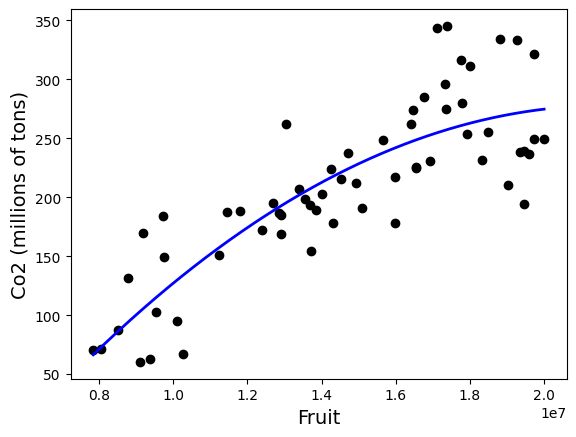

In [10]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)



y_pred = polyModel.predict(xPoly)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))

ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1188.2469498447635
MAE = 29.885173748160902
R-squared = 0.5027318418350676
k = 10:  1905.5204011325363
LOOCV:  1952.2983944636662


Text(0, 0.5, 'Co2 (millions of tons)')

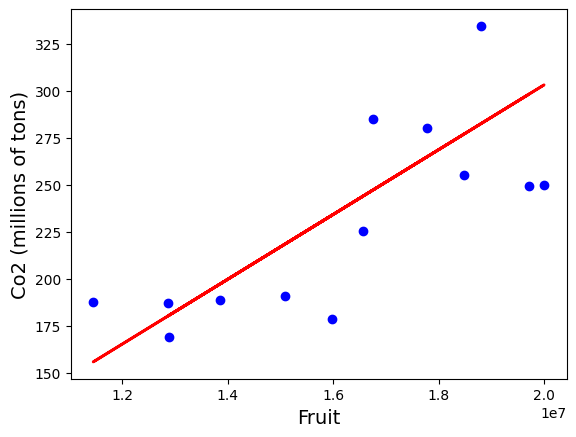

In [11]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

ten_fold_scores = -cross_val_score(
    linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=49)

print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1207.634046828239
MAE = 30.207598294637386
R-squared = 0.4946185569573768
k = 10:  1725.9269530503764
LOOCV:  1777.6287400090173


Text(0, 0.5, 'Co2 (millions of tons)')

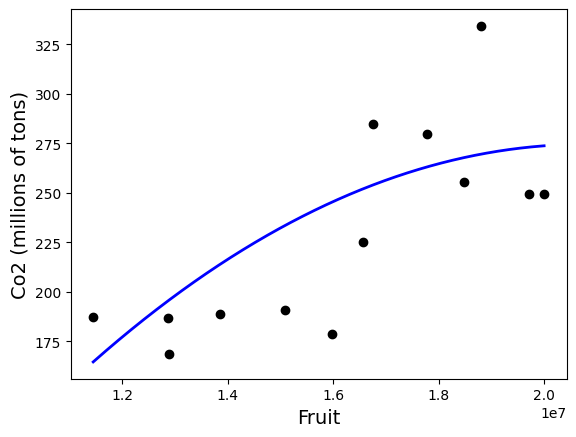

In [12]:


test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


MSE = 1230.378236358266
MAE = 29.42949901036639
R-squared = 0.4851003661149528
k = 10:  1688.4329160571374
LOOCV:  1732.902126482011


Text(0, 0.5, 'Co2 (millions of tons)')

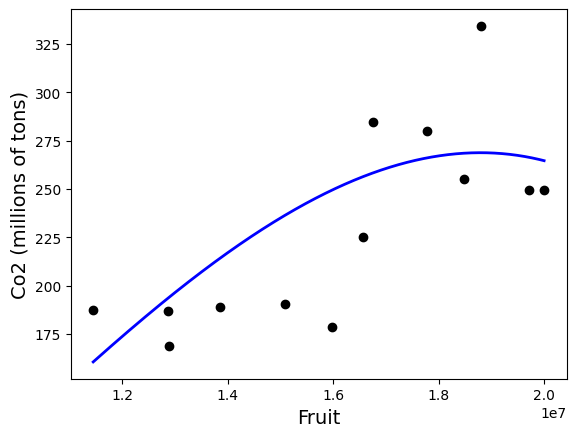

In [13]:
# DEGREE 3
test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


MSE = 1255.6916184893548
MAE = 27.81258015159438
R-squared = 0.4745069966887605
k = 10:  1662.0304079574307
LOOCV:  1696.1162381369911


Text(0, 0.5, 'Co2 (millions of tons)')

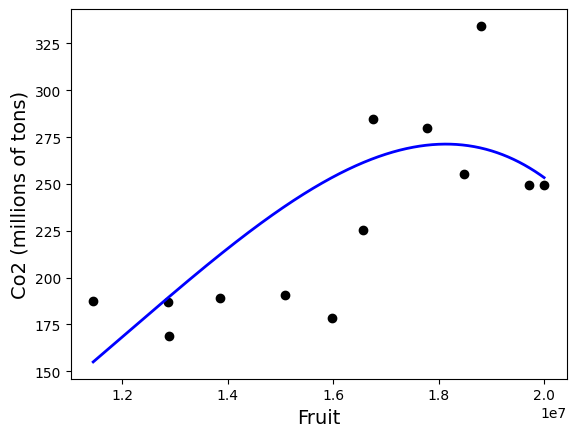

In [14]:
# DEGREE 4
test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=4, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)
